<a href="https://colab.research.google.com/github/Varshachintalapudi/OIBSIP/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

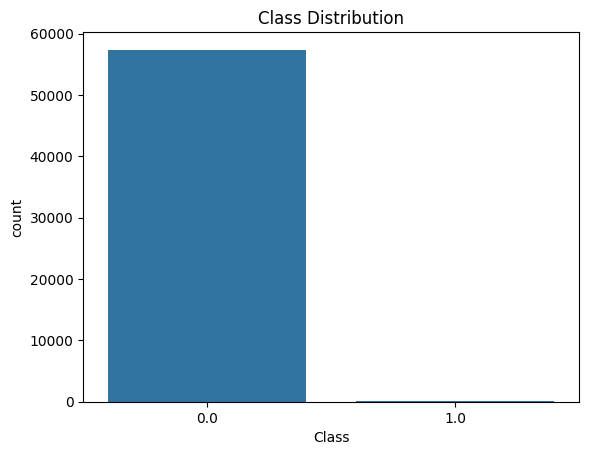

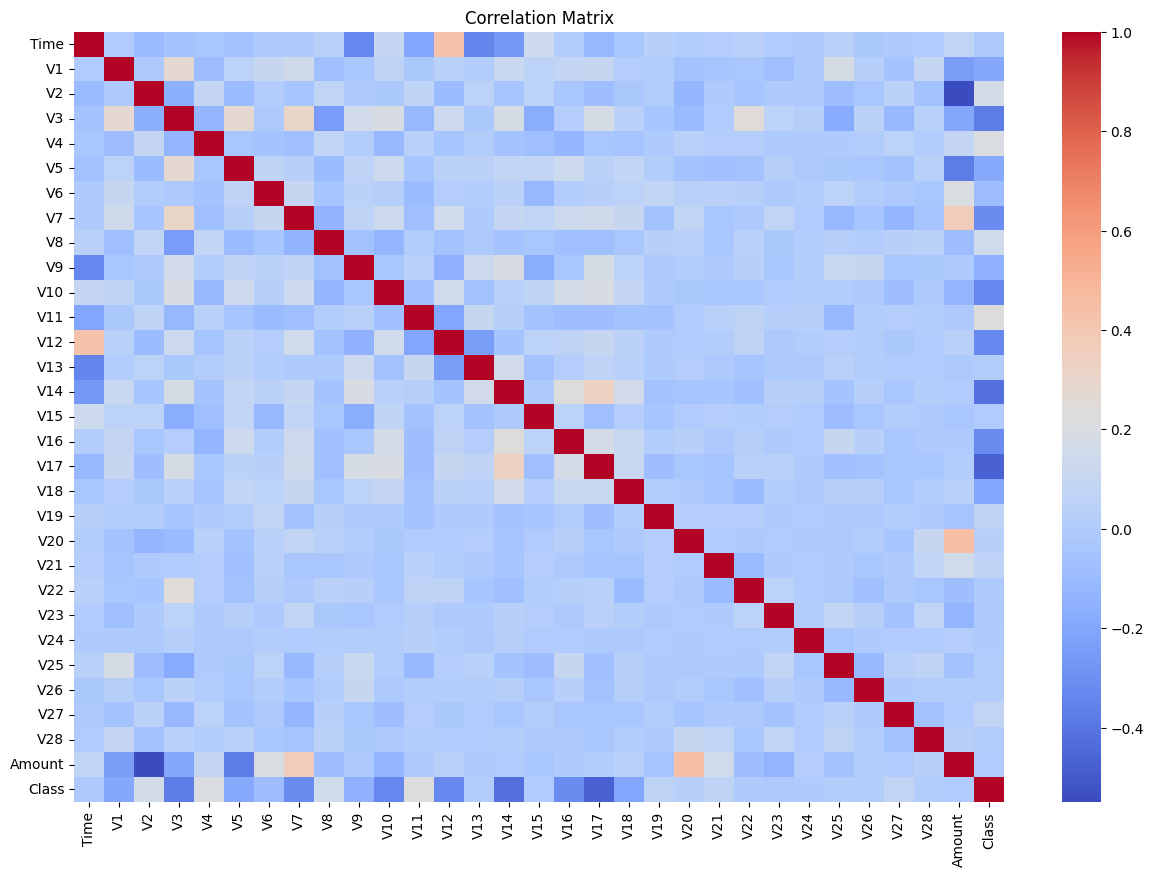

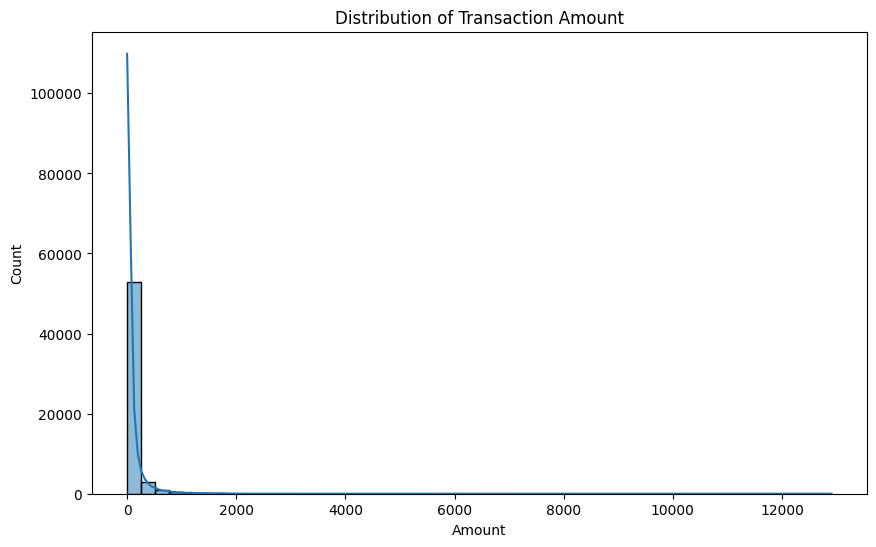

In [ ]:
# Check the first few rows of the dataset
print(data.head())

# Basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Count the number of fraudulent transactions
print(data['Class'].value_counts())

# Plotting the distribution of the 'Class' variable
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

# Check the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()


In [ ]:
import pandas as pd

# Assuming y is a pandas Series or a DataFrame
print(y.isna().sum())

1


In [ ]:
# Assuming y is a pandas Series
valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]


In [ ]:
import numpy as np
import pandas as pd

# Check if y contains NaN values
if np.any(pd.isna(y)):
    print("y contains NaN values.")


y contains NaN values.


In [ ]:
# Assuming X and y are pandas DataFrames or Series
df = pd.concat([X, y], axis=1)
df = df.dropna()
X_clean = df.iloc[:, :-1]
y_clean = df.iloc[:, -1]


In [ ]:
from sklearn.impute import SimpleImputer

# For X
imputer_X = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_imputed = imputer_X.fit_transform(X)

# For y
y_imputed = y.fillna(y.median())  # or another suitable strategy


In [ ]:
# Drop columns that may not be relevant for prediction
# (Assuming 'Time' column might not be relevant)


# Separate the features (X) and the target variable (y)
X = data.drop(['Class'], axis=1)
y = data['Class']

# Standardize the 'Amount' feature
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean)


In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9985514803870444


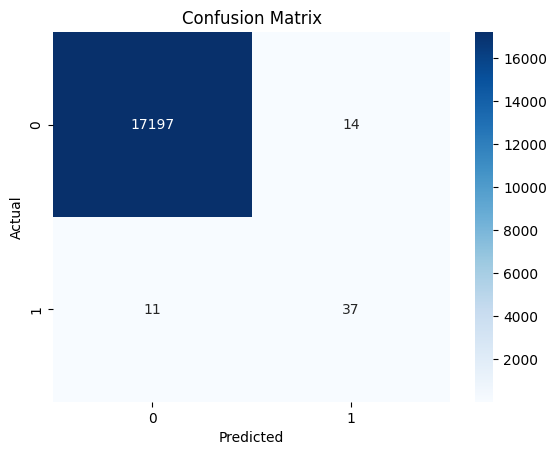

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17211
         1.0       0.73      0.77      0.75        48

    accuracy                           1.00     17259
   macro avg       0.86      0.89      0.87     17259
weighted avg       1.00      1.00      1.00     17259

ROC AUC Score: 0.9685605620436541


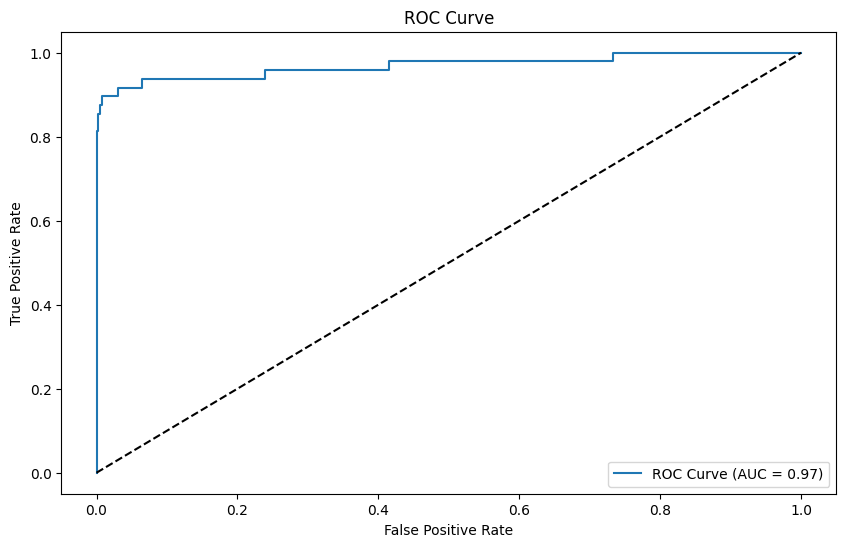

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
